In [118]:
# import libraries
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import talib
import seaborn as sns
import statsmodels.api as sm


In [119]:
# Download latest version of yahoo stock price dataset from Kaggle
path = kagglehub.dataset_download("arashnic/time-series-forecasting-with-yahoo-stock-price")
print("Path to dataset files:", path)
yahoo = pd.read_csv(path + "/yahoo_stock.csv")
yahoo['Date'] = pd.to_datetime(yahoo['Date'])
print(yahoo.head())

Path to dataset files: C:\Users\mckin\.cache\kagglehub\datasets\arashnic\time-series-forecasting-with-yahoo-stock-price\versions\3
        Date         High          Low         Open        Close  \
0 2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088   
1 2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893   
2 2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117   
3 2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117   
4 2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107   

         Volume    Adj Close  
0  3.587980e+09  2086.590088  
1  3.884930e+09  2089.139893  
2  2.852940e+09  2088.870117  
3  2.852940e+09  2088.870117  
4  1.466840e+09  2090.110107  


Look at the data

<Axes: >

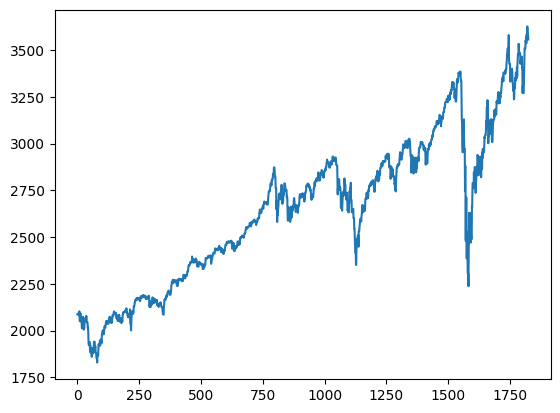

In [120]:
yahoo['Adj Close'].plot()

<Axes: >

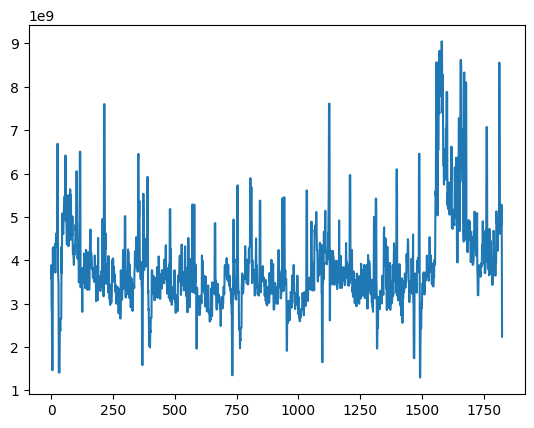

In [121]:
yahoo['Volume'].plot()

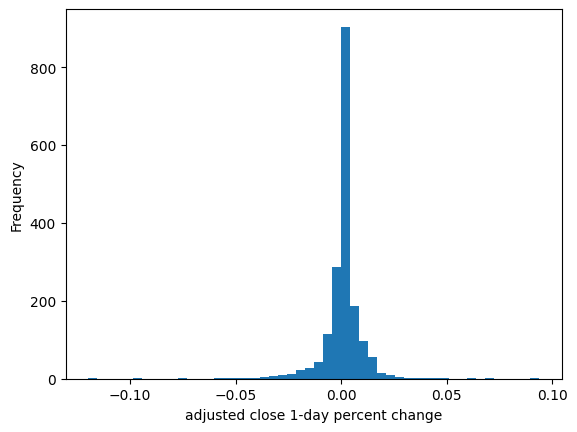

In [122]:
yahoo['Adj Close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')
plt.show()

In [123]:
yahoo['10d_future_close'] = yahoo['Adj Close'].shift(-10)
yahoo['10d_future_close_pct'] = yahoo['10d_future_close'].pct_change(10)
yahoo['10d_close_pct'] = yahoo['Adj Close'].pct_change(10)

print('Lenght of the dataset:', len(yahoo))
print(yahoo.head())

# calculate the correlation matrix between the 5d close percentage changes (current and future)
corr = yahoo[['10d_close_pct', '10d_future_close_pct']].corr()
print(corr)


Lenght of the dataset: 1825
        Date         High          Low         Open        Close  \
0 2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088   
1 2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893   
2 2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117   
3 2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117   
4 2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107   

         Volume    Adj Close  10d_future_close  10d_future_close_pct  \
0  3.587980e+09  2086.590088       2049.620117                   NaN   
1  3.884930e+09  2089.139893       2091.689941                   NaN   
2  2.852940e+09  2088.870117       2091.689941                   NaN   
3  2.852940e+09  2088.870117       2091.689941                   NaN   
4  1.466840e+09  2090.110107       2077.070068                   NaN   

   10d_close_pct  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
                

C:\Users\mckin\AppData\Local\Temp\ipykernel_7020\577908610.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  yahoo['10d_future_close_pct'] = yahoo['10d_future_close'].pct_change(10)


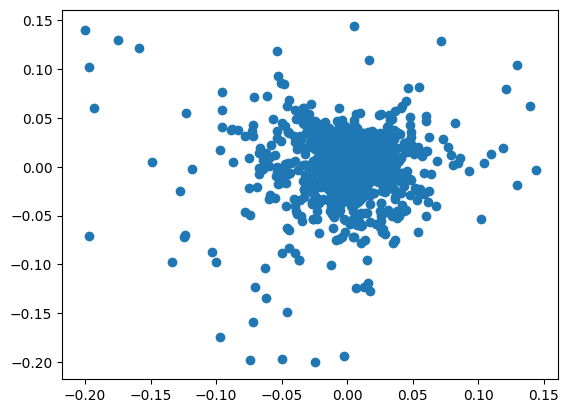

In [124]:
# scatter the current 10-day percent change vs the future 10-day percent change
plt.scatter(yahoo['10d_close_pct'], yahoo['10d_future_close_pct'])
plt.show()

Prepare data for ML

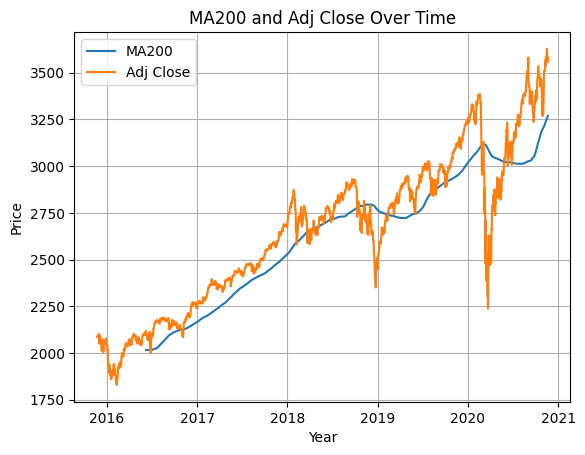

In [125]:
features = yahoo[['10d_close_pct', 'Adj Close', 'Volume']]
# our targets are the future price changes
targets = yahoo['10d_future_close_pct']

yahoo['ma14'] = talib.SMA(yahoo['Adj Close'].values, timeperiod=14)
yahoo['rsi14'] = talib.RSI(yahoo['Adj Close'].values, timeperiod=14)

yahoo['ma30'] = talib.SMA(yahoo['Adj Close'].values, timeperiod=30)
yahoo['rsi30'] = talib.RSI(yahoo['Adj Close'].values, timeperiod=30)

yahoo['ma50'] = talib.SMA(yahoo['Adj Close'].values, timeperiod=50)
yahoo['rsi50'] = talib.RSI(yahoo['Adj Close'].values, timeperiod=50)


yahoo['ma200'] = talib.SMA(yahoo['Adj Close'].values, timeperiod=200)
yahoo['rsi200'] = talib.RSI(yahoo['Adj Close'].values, timeperiod=200)

#plt the adj close price against the 200 day moving average
plt.plot(yahoo['Date'], yahoo['ma200'], label='MA200', linewidth=1.5)
plt.plot(yahoo['Date'], yahoo['Adj Close'], label='Adj Close', linewidth=1.5)

# Format x-axis ticks to show years only
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())

# Add labels, title, and legend
plt.title('MA200 and Adj Close Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


     10d_close_pct         ma14      rsi14         ma30      rsi30  \
200      -0.000420  2103.451416  53.117126  2080.485343  55.383448   
201      -0.001553  2103.237845  53.117126  2081.550675  55.383448   
202      -0.004365  2103.024275  53.117126  2083.199345  55.383448   
203      -0.009561  2101.595703  42.954849  2084.281014  50.753631   
204      -0.011343  2100.050711  41.093286  2085.238017  49.806609   

            ma50      rsi50        ma200     rsi200  
200  2077.223203  54.847854  2016.125801  50.234442  
201  2077.313003  54.847854  2016.160452  50.234442  
202  2077.402803  54.847854  2016.196452  50.234442  
203  2077.152402  52.365220  2016.147402  49.809038  
204  2076.903003  51.838782  2016.073452  49.716005  


<Axes: >

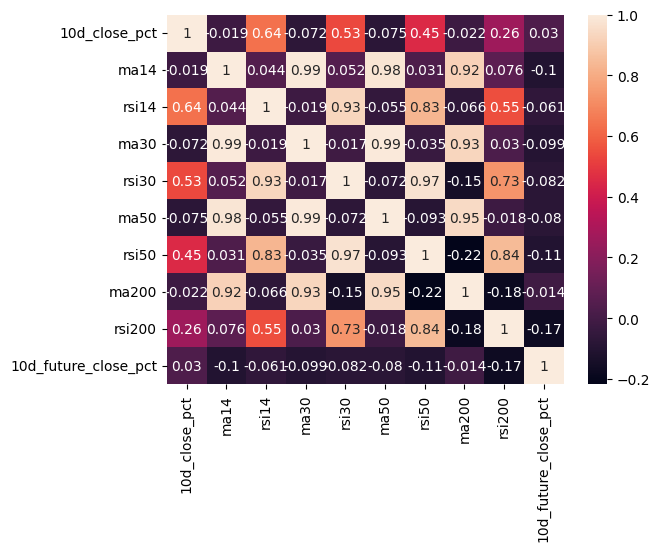

In [126]:
# drop na rows - ML can't handle them
yahoo = yahoo.dropna()

feature_names = ['10d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200']
features = yahoo[feature_names]
print(features.head()) 

targets = yahoo['10d_future_close_pct']

feature_target_df = yahoo[feature_names + ['10d_future_close_pct']]

corr = feature_target_df.corr()
sns.heatmap(corr, annot=True)

Linear Modeling with financial data

training data = earliest data
testing data = latest data

Can't use sklearn train-test-split as it randomly shuffles the dataset

In [127]:
# Add a constant to the features
# for linear models needs to add a constant to our features, which adds a columns of 1s for a y intercept term
linear_features = sm.add_constant(features)

print(targets.shape[0])
train_size = int(0.85 * targets.shape[0])

train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]

1615


In [128]:
# fit a linear model
model = sm.OLS(train_targets, train_features)
results = model.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     10d_future_close_pct   R-squared:                       0.109
Model:                              OLS   Adj. R-squared:                  0.103
Method:                   Least Squares   F-statistic:                     18.58
Date:                  Tue, 03 Dec 2024   Prob (F-statistic):           1.85e-29
Time:                          21:58:35   Log-Likelihood:                 3162.4
No. Observations:                  1372   AIC:                            -6305.
Df Residuals:                      1362   BIC:                            -6253.
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0302  

In [129]:
print(results.pvalues)

const            7.825733e-02
10d_close_pct    9.055948e-05
ma14             1.660892e-07
rsi14            9.480534e-02
ma30             1.697141e-03
rsi30            6.765483e-01
ma50             8.898587e-02
rsi50            3.982120e-01
ma200            1.457408e-05
rsi200           8.195478e-01
dtype: float64
